In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import pandas as pd

In [1]:
compression = [0.05, 0.1, 0.2, 0.5, 1, 2]
arch = ['Rand', 'Mag', 'SNIP', 'GraSP', 'SynFlow']

In [5]:
colors = {
    'Rand': 'r',
    'Mag': 'm',
    'SNIP': 'y',
    'GraSP': 'g',
    'SynFlow': 'b'
}

### Accuracies:

In [9]:
acc = {
    'Rand': [89.70, 84.41, 85.41, 86.17, 10.00, 10.00],
    'Mag': [88.38, 89.12, 89.79, 89.88, 88.98, 10.00],
    'SNIP': [85.72, 89.14, 89.53, 80.27, 83.92, 86.18],
    'GraSP': [35.34, 29.71, 28.19, 29.79, 22.76, 27.59],
    'SynFlow': [89.55, 77.98, 80.09, 81.12, 75.38, 10.0]
}

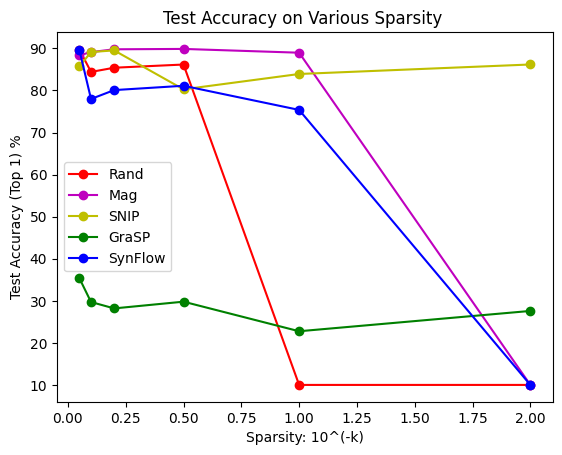

In [11]:
plt.figure()
plt.title("Test Accuracy on Various Sparsity ")
plt.xlabel("Sparsity: 10^(-k)")
plt.ylabel("Test Accuracy (Top 1) %")
for a in arch:
  plt.plot(compression, acc[a], '-o', color=colors[a], label=a)

plt.legend()
plt.show()

### Times:

In [23]:
time = {
    'Rand': [1.717, 1.869, 1.863, 1.801, 1.962, 1.991],
    'Mag': [2.071, 2.080, 2.071, 2.146, 1.991, 2.121],
    'SNIP': [2.102, 2.099, 2.102, 2.091, 2.102, 2.028],
    'GraSP': [2.35, 1.981, 1.834, 1.997, 1.952, 2.012],
    'SynFlow': [1.848, 1.971, 1.789, 1.926, 1.910, 1.998]
}

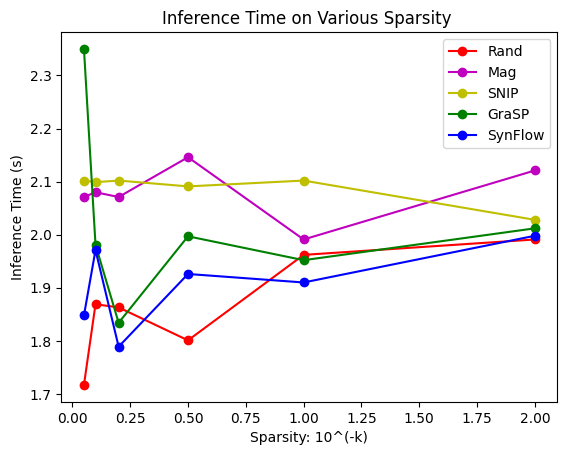

In [24]:
plt.figure()
plt.title("Inference Time on Various Sparsity ")
plt.xlabel("Sparsity: 10^(-k)")
plt.ylabel("Inference Time (s)")
for a in arch:
  plt.plot(compression, time[a], '-o', color=colors[a], label=a)

plt.legend()
plt.show()

### FLOP:

In [25]:
flop = {
    'Rand': [0.8910,0.7937,0.6310, 0.3167 ,0.1007, 0.0108],
    'Mag': [0.9184, 0.8451, 0.7204, 0.4638, 0.2452, 0.0781],
    'SNIP': [0.9753, 0.9269, 0.7819, 0.4632, 0.2021, 0.0446],
    'GraSP': [0.8209, 0.7313, 0.5727, 0.3760, 0.1738, 0.0592],
    'SynFlow': [0.9488, 0.9026, 0.8217, 0.6423, 0.4871, 0.1798]
}

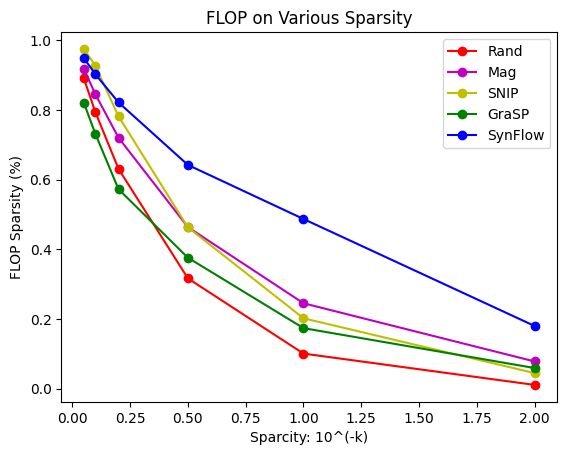

In [28]:
plt.figure()
plt.title("FLOP on Various Sparsity")
plt.xlabel("Sparcity: 10^(-k)")
plt.ylabel("FLOP Sparsity (%)")
for a in arch:
  plt.plot(compression, flop[a], '-o', color=colors[a], label=a)

plt.legend()
plt.show()

## Compression Ratio of Each Layer

In [ ]:
arch = ['rand', 'mag', 'snip', 'grasp', 'synflow']

colors = {
    'rand': 'r',
    'mag': 'm',
    'snip': 'y',
    'grasp': 'g',
    'synflow': 'b'
}

In [ ]:
Model = {}

for a in arch:
  Model[a] = torch.load('Results/data/singleshot/{}/model.pt'.format(a))

In [ ]:
def plot_weight_histograms(model, method):
    num_layers = sum('weight' in layer and 'mask' not in layer for layer in model[method])

    bins = np.linspace(-2,2,50)

    fig, axes = plt.subplots(nrows=int(np.ceil(num_layers / 4)), ncols=4, figsize=(20, 5 * np.ceil(num_layers / 4)))
    axes = axes.flatten()

    i = 0
    for layer in Model[method]:
        if 'weight' in layer and 'mask' not in layer:
            weights = model[method][layer].flatten().numpy()
            axes[i].hist(weights, bins=bins, color=colors[a])
            axes[i].set_title(f'{method}: {layer}')
            i += 1

    for j in range(i, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

### Rand

In [ ]:
plot_weight_histograms(Model, 'rand')

### Mag

In [ ]:
plot_weight_histograms(Model, 'mag')

### SNIP

In [ ]:
plot_weight_histograms(Model, 'snip')

### GraSP

In [ ]:
plot_weight_histograms(Model, 'grasp')

### SynFlow

In [ ]:
plot_weight_histograms(Model, 'synflow')

## Bonus: FLOP

In [ ]:
layerFlopVal = {
    'Rand': [],
    'Mag': [],
    'SNIP': [],
    'GraSP': [],
    'SynFlow': []
}

layerNum = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

arch = ['Rand', 'Mag', 'SNIP', 'GraSP', 'SynFlow']

colors = {
    'Rand': 'r',
    'Mag': 'm',
    'SNIP': 'y',
    'GraSP': 'g',
    'SynFlow': 'b'
}

In [ ]:
layer = {}

for a in arch:
  layer[a] = pd.read_pickle('Results/data/singleshot/{}/compression.pkl'.format(a))

In [ ]:
for i in range(len(layerNum)):
    for a in arch:
      val = layer[a].iloc[2 * i]['sparsity']
      layerFlopVal[a].append(val)

In [ ]:
for a in arch:
    plt.plot(layerNum, layerFlopVal[a], '-o', color=colors[a], label=a)

plt.title("FLOP Sparsity of Each Layer")
plt.xlabel("Prunable Layer")
plt.ylabel("FLOP Sparsity %")

plt.show()